## Real Estate - Price Predictor
---

### INTRODUCTION
In this small project we will see how we can apply Machine Learning Algorithem to predict the Real Estate Price. 

### About Dataset
- I will use "**Boston Housing Dataset**," a classic dataset used in machine learning for regression. It was originally created by Professor **Thomas Bishop at MIT.**  It's a well-known and widely used dataset.

- This dataset is a collection of features (independent variables) and a target variable (median house value) that are commonly used in real estate analysis.  It's a classic dataset for predicting house prices.  You could use this data for:

  - **Predictive Modeling:**  Building a model to predict house prices based on the features.
  - **Feature Importance Analysis:**  Determining which features have the biggest impact on house prices.
  - **Geographic Analysis:**  Understanding how location and neighborhood characteristics affect property values.
  - **Market Analysis:**  Analyzing trends in the real estate market.

- **Each Column Description :**
  - **CRIM (Crime Rate):**  This is almost certainly the crime rate per 1000 residents in the area.  Higher values indicate higher crime.  A key factor in property values.

  - **ZN (Zinc Ratio):** This is likely a ratio of zinc to total house value. It's a measure of the quality of the housing stock. Higher values suggest better quality homes.The term "zinc ratio" in real estate isn't a standard or widely recognized term. It's possible it refers to the ratio of zinc-related materials or components used in a property's construction or maintenance. 

  - **INDUIS (Industrial):**  This probably represents the proportion of land in the area zoned for industrial use.  Higher values mean more industrial land.  Can impact property values (positively or negatively, depending on the type of industry).

  - **CHAS (Charles):** This is a bit less obvious without more context, but it's often related to the presence of Charles River or other water features. It could indicate proximity to a river, lake, or other body of water.  Proximity to water often increases property values.

  - **NOX (Nitrogen Oxide):**  This is likely a measure of air pollution, specifically nitrogen oxide levels.  Higher values indicate more pollution.  Air quality is a factor in desirability and property values.

  - **RM (Room Size):**  This is the average size of the rooms in the houses in the area.  It's a measure of the size of the homes.  Larger rooms generally correlate with higher property values.

  - **AGE (Age):**  This is the average age of the housing stock in the area.  Older homes might have more character but could also require more maintenance.  A mix of ages is often desirable.

  - **DIS (Distance):**  This is the distance from the house to amenities, like stores, schools, or major employment centers.  Shorter distances are generally more desirable.

  - **RAD (Radon):**  This represents the average radon level in the area. Radon is a radioactive gas that can be harmful to health.  Higher values indicate a greater risk.

  - **TAX (Tax):**  This is the property tax rate.  Higher taxes can make an area less attractive to buyers.

  - **PTRATIO (Pupil-Teacher Ratio):**  This is the ratio of students to teachers in the local schools.  Lower ratios are generally considered better, indicating smaller class sizes and potentially better education.

  - **B (Brokers):** This is the number of real estate brokers in the area per 1000 residents.  Higher values might indicate a more active real estate market.

  - **LSTAT (Loan Amount):** This is the average loan amount used to purchase homes in the area.  It reflects the affordability of housing.

  - **MEDV (Median Value):** This is the median (middle) sale price of houses in the area.  This is the primary target variable in many real estate datasets.  It's a key indicator of property values.

### Step 1 : Load the dataset

In [186]:
import pandas as pd
housing = pd.read_csv("Boston Housing Dataset.csv")
housing.head()  # This will give top 5 entries from the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [187]:
# Optional : If we want to check the datatype  

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [188]:
# Optional : If we want to check the std min max etc.

housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [189]:
%matplotlib inline

### Step 2 : Divide the dataset into train and test

In [190]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



### Step 3 : Shuffle the data
It should be done because sometime data is concentrated in specfic area of dataset which can be impact. When we will split the data. There is possiblity the data can be either be go only in train or test dataset. 

In [191]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [192]:
## .value_counts() It count different values present in side selected columns
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [193]:
# Copy the dataset
housing = strat_train_set.copy()

### Step 4 : Check Correlation 
This give the correlation between the different columns 

In [194]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

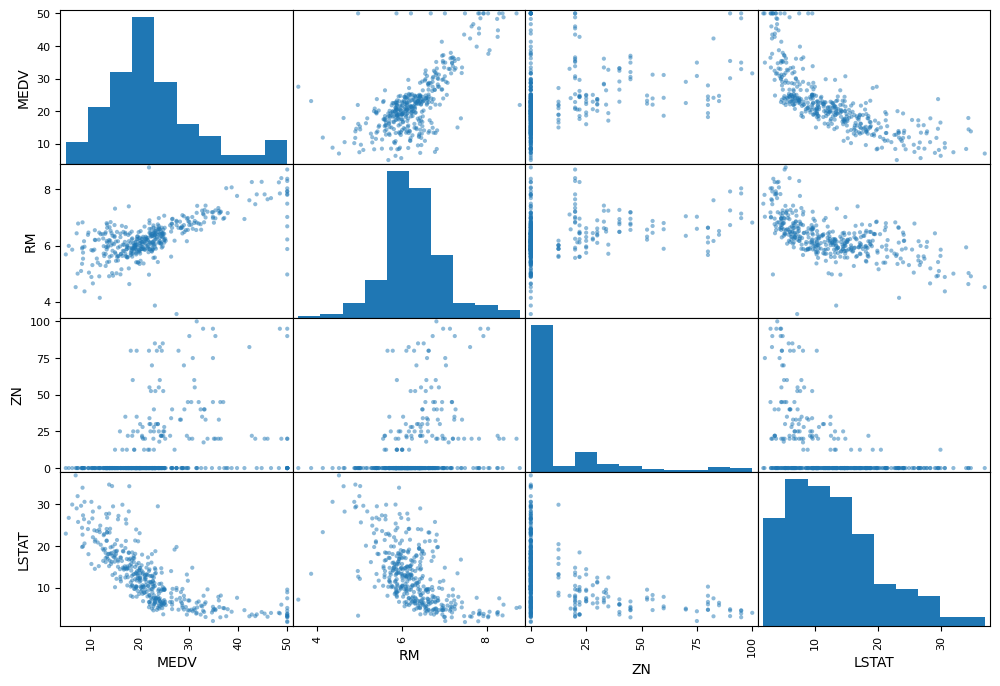

In [195]:
## Correction in the charts
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

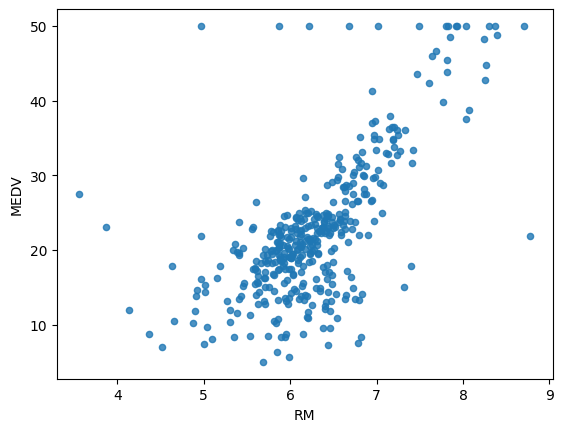

In [196]:
# Correction between specfic columns only 
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Optional ( Generate Needed columns )
Trying out Attribute combinations, Sometimes we have to generate the columns from the existing dataset so we can use those columns to check correction.



In [197]:
housing["TAXRM"] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [198]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

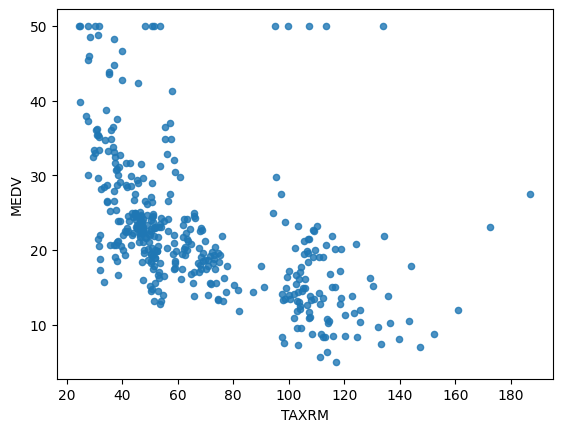

In [199]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

## Divide the data into features and labels
- **housing** will have all the features
- **housing_labels** will contain all the label relate the to price as per provied information

In [200]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

### Step 4 : Missing Attributes
To take care of missing attributes, you have three options:
- **Option 1 :** Get rid of the missing data points
- **Option 2 :** Get rid of the whole attribute
- **Option 3 :** Set the value to some value(0, mean or median)
    - Here we will make the strategy how we can fill the empty values in columns 

#### **Option 1 :** Get rid of the missing data points

In [201]:
#  NaN values represent missing data which can be remove using .dropna()
    # Note : .dropna() Main dataframe remain
a = housing.dropna(subset=["RM"]) 
a.shape  # Shape is 13 Which means all columns are present 

(399, 13)

#### **Option 2 :** Get rid of the whole attribute

In [202]:
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged
housing.drop("RM", axis=1).shape # Option 2


(404, 12)

In [203]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


#### **Option 3 :** Set the value to some value(0, mean or median)
To use this option we should need on strategy how we can fill the empty spaces. For this we will **median strategy** to fill the empty spaces. 
- Step 1 : We will check each column count using **dataframe.describe()**.
    - In the current Dataframe RM column have 399 option only. If all the columns do not have NaN then we can avoid this step
- Step 2 : Use **Sklearn imputer to fill the empty count using median strategy**
    ```bash
        from sklearn.impute import SimpleImputer               # Import imputer
        imputer = SimpleImputer(strategy="median")             # Apply Strategy
        imputer.fit(housing)                                   # Fit dataframe
        X = imputer.transform(housing)                         # Transform/Apply imputer strategy 
        housing_tr = pd.DataFrame(X, columns=housing.columns)  # Change back the imputer function back to dataframe
    ```
- Step 3 : Check the tranform dataframe with **dataframe.describe()**
    - Now we will have 404 entries the [RM] column of newdataframe

In [204]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [205]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [206]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [207]:
housing_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15


### Step 5 : Scaling 
Till Now most the things are done But there is one issue.
- Some column have values between 0-1 and some column have values more 100.
- We have arrange the column values so all the values should be at same scale this is called **feature scaling.** 

**FEATURE SCALING**
Primarily, Two types of feature scaling method use
1. Min-max scaling (Normalization)
    
    **(value - min)/(max - min)**

    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    
    **(value - mean)/std**
    
    Sklearn provides a class called StandardScaler for this

#### **Implementation :** Get rid of the Scaling issue
To use this option we will use the **StandardScaler**
- Step 1 : We will check each column using **dataframe.head()** TAX column have more 100 number values and NOX column will have values lesser than 1. So fix this issue we will featurescaling if in your dataset all the values looks similar this step is option 
    - For example in the existing dataset 
- Step 2 : Use **sklearn.preprocessing import StandardScaler to scale the values**
    ```bash
        from sklearn.preprocessing import StandardScaler               # Import StandardScaler
        scaler = StandardScaler()                                      # Instantiate teh class
        scaler.fit(housing_tr)                                         # Fit dataframe
        housing_scaled = scaler.transform(housing_tr)                  # Transform/Apply Standard Scaler
        housing_scaled = pd.DataFrame(housing_scaled, columns=housing_tr.columns)  # Change back the Scaler function back to dataframe
    ```
- Step 3 : Check the tranform dataframe with **dataframe.head()**
    - Now we will have data where all the column lies with in normalized range

## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

In [208]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(housing_tr)
housing_scaled = scaler.transform(housing_tr)
housing_scaled = pd.DataFrame(housing_scaled, columns=housing_tr.columns)
housing_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.439420,3.126282,-1.121650,-0.272888,-1.422627,-0.239793,-1.312388,2.611114,-1.001686,-0.577819,-0.974918,0.411642,-0.860910
1,-0.443522,3.126282,-1.358938,-0.272888,-1.054257,0.500912,-1.393881,2.193123,-0.657667,-0.785579,-0.692779,0.391319,-0.941167
2,0.156823,-0.489831,0.983368,-0.272888,0.479194,0.288680,0.870210,-0.687307,1.635794,1.505715,0.811966,0.446243,0.814802
3,-0.422929,-0.489831,-0.577199,-0.272888,-0.557384,0.136884,-0.522259,0.378825,-0.542994,-0.744027,0.529827,0.453435,-0.819398
4,-0.407863,-0.489831,-0.577199,-0.272888,-0.557384,0.046932,-1.422226,0.796434,-0.542994,-0.744027,0.529827,0.453435,-0.919028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.008382,-0.489831,1.198819,3.664502,2.680852,-0.177950,0.480460,-0.954329,-0.542994,-0.055452,-1.774314,-2.765837,0.308352
400,0.426191,-0.489831,0.983368,-0.272888,0.479194,-0.246821,0.569040,-0.822535,1.635794,1.505715,0.811966,-3.656820,1.452707
401,-0.435257,-0.489831,-1.230832,-0.272888,-0.968589,2.166445,-1.138772,-0.119730,-0.887013,-0.809323,-0.222546,0.418312,-1.276033
402,0.142107,-0.489831,0.983368,-0.272888,1.327303,0.346306,0.618644,-0.625059,1.635794,1.505715,0.811966,-3.152392,0.738696


## Optional but recommendable : Creating a Pipeline
It is always better to write the code prcisely and smaller. To achieve this we can use pipeline where we can apply create the pipline where we can do mulitplie operation. 

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [210]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

----
## Data Cleaning Done
---

## Step 6 : Apply the ML model 
Here will will select a desired model for Real Estate agency. 


In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Optional : Pre-Testing
In this i will pass only 5 rows only to check wheather the our system is working or not. 
if it working that mean everything is good and i can go further

In [212]:
some_data = housing.iloc[:5]                         # Select 5 rows features
some_labels = housing_labels.iloc[:5]                # Select 5 rows columns
prepared_data = my_pipeline.transform(some_data)     # Transform the data { Apply strategy to remove NaN values and Sclaed all columns at same level }
model.predict(prepared_data)                         # Predict the output from some_data
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Step 7 : Evaluating the model
After using different model we can check error using evalution in this i am going to use the mean squared error 

In [213]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)                                 # This is root means square error 

In [214]:
rmse

np.float64(1.2543121443426843)

## Using better evaluation technique - Cross Validation

In [215]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [216]:
rmse_scores

array([3.02616405, 2.77505441, 4.39198578, 2.66641681, 3.45028542,
       2.63151928, 4.58337457, 3.33870503, 3.42371114, 3.17819268])

In [217]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [218]:
print_scores(rmse_scores)

Scores: [3.02616405 2.77505441 4.39198578 2.66641681 3.45028542 2.63151928
 4.58337457 3.33870503 3.42371114 3.17819268]
Mean:  3.346540918053825
Standard deviation:  0.6380357395076085


## Step 8 : Saving the model

In [219]:
from joblib import dump, load
dump(model, 'realestate.joblib') 

['realestate.joblib']

## Step 9 : Testing the model on test data

In [220]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.672 11.577 25.336 21.969 18.766 15.05  20.049 14.884 31.772 42.363
 19.658 11.987 23.39  27.148 19.527 11.267 31.871 13.993 23.404 18.045
 20.078 17.73  16.045 22.09  18.78  31.201 16.185 33.053  9.08  33.884
 23.79  21.447 23.106 10.902 20.775 11.536 44.12  24.675 23.22  42.089
 24.062 29.772 20.779 20.857 18.743 33.494 44.448 20.123 20.456 21.381
 21.387 14.533 21.352 15.039 24.914 33.439 41.9   29.434 19.291 20.801
 46.287  9.788 18.855 26.045 14.684 33.69  19.565 17.923 19.218 34.657
 26.122 22.883 21.053 22.512 35.053 12.767 15.771 19.782 20.851 21.307
 22.777 21.353 14.681 23.148 20.923 21.444 13.831 20.854 21.728 23.467
 18.621 26.652  7.593 26.585 19.774 29.078 20.062 31.628 14.499 26.744
 21.039 20.308] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [221]:
final_rmse

np.float64(2.936287072905135)

In [222]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Step 10 : Load the save model and use 

In [223]:
from joblib import dump, load
import numpy as np
model = load('realestate.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([23.518])